<a href="https://colab.research.google.com/github/DanielaVizcarra/HANDS-ON-5-KNN/blob/main/tarea_hands_on_5_knn_vizcarra_bernal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

definimos los datos que vamos a usar y creamos la clase dataset con su constructor y sus metodos get


In [ ]:
# Datos de entrenamiento y nuevo punto
datos = {'Peso': [50, 80, 97, 45, 61, 52, 78, 58, 42, 76, 83, 69],
         'Altura': [1.48, 1.82, 1.76, 1.55, 1.60, 1.87, 1.82, 1.68, 1.85, 1.72, 1.60, 1.59],
         'Genero': ['MUJER', 'HOMBRE', 'HOMBRE', 'MUJER', 'MUJER', 'HOMBRE', 'HOMBRE', 'MUJER', 'HOMBRE', 'HOMBRE', 'MUJER', 'HOMBRE']}
ndata = {'Peso': [65], 'Altura': [1.60]}

class Dataset:
    def __init__(self):  # Constructor
        self.X = datos['Peso']
        self.Y = datos['Altura']
        self.clases = datos['Genero']

    def getX(self):#Obtenemos el valor de X y Y, get accede a los datos de X y Y mietras que self.-  accede al atributo X o Y  instanciados dentro del objeto de la clase
        return self.X

    def getY(self):
        return self.Y

    def getClases(self):
        return self.clases




creamos la instancia data_set para poder acceder a los datos de la clase contenidos en las variables X y Y.

Generamos una lista de tuplas, donde cada una contiene el peso, la altura y el género.

In [ ]:
# Preparamos datos para entrenamiento
data_set = Dataset()
X = data_set.getX()
Y = data_set.getY()
classes = data_set.getClases()
datos_entrenamiento = list(zip(zip(X, Y), classes))

Luego de esto creamos la clase KNN que implementa el algoritmo de vecinos más cercanos (k-NN).

Donde se inicializa la instancia con el valor de k y una lista vacía para los datos de entrenamiento.Se almacena los datos de entrenamiento en la instancia de la clase.Calcula la distancia euclidiana entre dos puntos.

formula: d(p,q)=
(x
2
​
 −x
1
​
 )
^2
 +(y
2
​
 −y
1
​
 )
^2

​


In [ ]:
class KNN:
    def __init__(self, k):
        self.k = k
        self.datos_entrenamiento = []

    def entrenar(self, datos_entrenamiento):
        # Almacena los datos de entrenamiento
        self.datos_entrenamiento = datos_entrenamiento

    def _euclidean_distance(self, x, y):
        # Calcula la diferencia en cada punto o coordenada
        diff_x_y = [x_i - y_i for x_i, y_i in zip(x, y)]

        # Eleva al cuadrado cada diferencia
        squared_diff = [diff_i ** 2 for diff_i in diff_x_y]

        # Suma los cuadrados de las diferencias
        sum_squared_diff = sum(squared_diff)

        # Calcula la raíz cuadrada de la suma de los cuadrados
        distance = sum_squared_diff ** 0.5

        return distance

    def predecir_clase(self, nuevo_punto):
        distancias = []

        # Calcula la distancia entre el nuevo punto y cada punto en el conjunto de datos de entrenamiento
        for punto, clase in self.datos_entrenamiento:
            distancia = self._euclidean_distance(nuevo_punto, punto)
            distancias.append((distancia, clase))

        # Ordena las distancias de menor a mayor
        distancias.sort(key=lambda x: x[0])

        # Toma las primeras k distancias (vecinos más cercanos)
        k_vecinos = distancias[:self.k]

        # Cuenta las clases de los k vecinos
        clases_vecinos = [vecino[1] for vecino in k_vecinos]

        # Devuelve la clase más común entre los vecinos
        clase_predicha = max(set(clases_vecinos), key=clases_vecinos.count)

        return clase_predicha


Creamos una instancia de la clase KNN con k=3 y entrena el modelo con los datos de entrenamiento.

In [ ]:
# Creamos instancia y le damos un valor a k
knn = KNN(k=3)
knn.entrenar(datos_entrenamiento)

Ahora si realizamos la predicción para el nuevo punto.

In [ ]:
# Realizamos la predicción
nuevo_punto = (ndata['Peso'][0], ndata['Altura'][0])
clase_predicha = knn.predecir_clase(nuevo_punto)
print(f'El nuevo punto {nuevo_punto} se predice como clase: {clase_predicha}')

El nuevo punto (65, 1.6) se predice como clase: MUJER


Podemos vizualizar los datos de entrenamiento y el nuevo punto en un gráfico de dispersión importando la bilbioteca **matplotlib.pyplot**

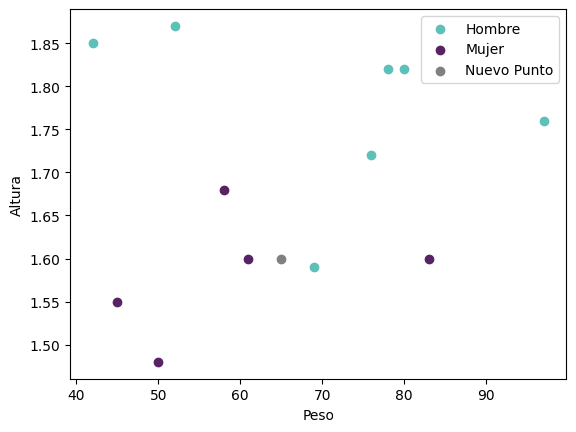

In [ ]:
import matplotlib.pyplot as plt

import matplotlib.pyplot as plt
colors = {'HOMBRE': '#5dc1b9', 'MUJER': '#572364'}
plt.scatter([p[0] for p, g in datos_entrenamiento if g == 'HOMBRE'],
            [p[1] for p, g in datos_entrenamiento if g == 'HOMBRE'],
            c=colors['HOMBRE'], label='Hombre')
plt.scatter([p[0] for p, g in datos_entrenamiento if g == 'MUJER'],
            [p[1] for p, g in datos_entrenamiento if g == 'MUJER'],
            c=colors['MUJER'], label='Mujer')
plt.scatter(nuevo_punto[0], nuevo_punto[1], c='grey', label='Nuevo Punto')
plt.xlabel("Peso")
plt.ylabel("Altura")
plt.legend()
plt.show()
